# Random walk on $\mathbb{R^2} \ltimes \mathbb{R}$


This notebook illustrates the behavior of  random walks on Lie groups of the form $\mathbb{R^2} \ltimes_{\phi} \mathbb{R}$ where $\phi : \mathbb{R} \to \mathrm{GL}_2(\mathbb{R})$ with 
$$\phi(x) = \left(\begin{array}{cc} 
\mathrm{e}^{l_1 x} & 0\\
0 & \mathrm{e}^{l_2 x } 
\end{array}\right)
$$ 
$l_1, l_2$ are fixed real numbers.


We will need some python modules:



In [1]:
%matplotlib widget
from IPython.display import display, clear_output
import numpy as np
import random as rd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
#from collections import deque


We define multplication on $\mathbb{R^2} \ltimes \mathbb{R}$ which is topologically $\mathbb{R^3}$ .


In [2]:
def mult(X,Y,l1 = 0 , l2 = 0 ) : #elements of the groups are represented by list of three floats 
    z = X[2]
    return [X[0] + np.exp(l1*z)*Y[0]  , X[1] + np.exp(l2*z)*Y[1],  z + Y[2] ] #np.exp is the exponential function

We fix a compactly supported distribution $\mu$ on  $\mathbb{R}^3$ and use for the random walk. If $Y_n$ is a sequence of i.i.d. random variables with common distribution $\mu$. We set $X_0 = (0,0,0)$ and we define $X_{n+1} = X_n \times Y_{n}$ for $n \geq 0$ where multplication is computed in $\mathbb{R^2} \ltimes \mathbb{R}$. The random_walk function returns the list of values $(X_0, X_1 , \dots, X_N)$. 


 Whatever the values of $l_1 , l_2 $ are, the z-coordinate is always a standard random walk on $\mathbb{R}$.

In [3]:

def distrib(): #this is mu, it is currently not symmetric for all values of l1 and l2
    return [rd.uniform(-1,1), rd.uniform(-1,1), rd.choice([-1/4,1/4])]

X0 = [0,0,0]

def random_walk(X0 = X0, N = 500, l1 = 0, l2 = 0):
    X = [None]*N
    X[0] = X0
    for i in range(N-1):
        Y = distrib()
        X[i+1] = mult(X[i],Y, l1 = l1, l2 = l2)
    return X


## Plots

This creates some visualization of the random walk with different parameters of $l_1, l_2$. 


In [4]:
def walk_plot_3D(X): #this functions creates a 3D plot of the random walk X
    Xx  = [a[0] for a in X]
    Xy = [a[1] for a in X ]
    Xz = [a[2] for a in X]

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.plot3D(Xx, Xy, Xz, 'blue')

def walk_plot_2D(X): #this is the projection on the random walk on R^2 x {0}, the color corresponds to the z-value, 
    #blue corresponds to negative values of z, colder blue corresponds to lower values
    #red corresponds to negative values of z, more orange colors, correspond to higher values (yellow is the highest)
    Xx  = [a[0] for a in X]
    Xy = [a[1] for a in X ]
    Xz = [a[2] for a in X]
    n = len(Xz)
    v = np.sqrt(n) # renormalization of colors to adapt to the expected range of the walk in z
    couleurs =  [(1 if a > 0 else 0,  1 -max(0,min(1,a/(2*
    v) + 1/2)),1 if a <= 0 else 0 ) for a in Xz] 
    #print(len(couleurs))
    fig = plt.figure()
    plt.xlabel("x")
    plt.xlabel("y")
    plt.plot(Xx, Xy, color = 'grey')
    plt.scatter(Xx, Xy, s = 10, c = couleurs)
    


def walk_plot_2D_log(X): #this plots the 2d projection of the walk in a logarithmic scale, colors are the same as before
    Xx  = [ np.sign(a[0])*np.log(1 + np.abs(a[0])) for a in X]
    Xy  = [ np.sign(a[1])*np.log(1 + np.abs(a[1])) for a in X]
    Xz_non_log = [a[2] for a in X] #for colors
    Xz = [ np.sign(a[2])*np.log(1 + np.abs(a[2])) for a in X]


    n = len(Xz)
    v = np.sqrt(n)
    couleurs =  [(1 if a > 0 else 0,  1 -max(0,min(1,a/(2*
    v) + 1/2)),1 if a <= 0 else 0 ) for a in Xz_non_log]
    fig  = plt.figure()
    plt.xlabel("x")
    plt.xlabel("y")
    plt.scatter(Xx, Xy, s = 5, c = couleurs)
    plt.plot(Xx, Xy, color = 'grey')


def walk_plot_2D_excursion(X):  #This plots in different colors the parts of the walks between two times where z = 0.
    Xx  = [a[0] for a in X]
    Xy = [a[1] for a in X ]
    Xz = [a[2] for a in X]
    excursions = []
    fig  = plt.figure()
    plt.xlabel("x")
    plt.xlabel("y")
    for i in range(1,len(Xz)):
        if Xz[i]*Xz[i-1]<=0:
            excursions.append(i)
    for i in range(len(excursions) -1):
        d = excursions[i]
        f = excursions[i+1]
        plt.plot(Xx[d:f+1], Xy[d:f+1])


def time_plot(X): #plots the evolution in time of the 2D projection one of the axes is time.
    t = np.linspace(0,len(X)-1, len(X) )
    Xx  = [a[0] for a in X]
    Xy = [a[1] for a in X ]
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel("t")
    ax.set_ylabel("x")
    ax.set_zlabel("y")
    ax.plot3D(t,Xx, Xy, 'gray')

    def time_plot_2D(X): #plots the evolution in time of the X, Y and Z coordinates
        t = np.linspace(0,len(X)-1, len(X) )
        Xx  = [a[0] for a in X]
        Xy = [a[1] for a in X ]
        Xz = [a[2] for a in X]
        fig  = plt.figure()
        plt.plot(t,Xx, 'green', label = "x")
        plt.plot(t,Xy, 'yellow', label = 'y')
        v = np.sqrt(len(Xz))
        couleurs =  [(1 if a > 0 else 0,  1 -max(0,min(1,a/(2*
        v) + 1/2)),1 if a <= 0 else 0 ) for a in Xz]
        #print(len(couleurs))
        
        plt.scatter(t,Xz, c = couleurs, label = "z" )


def time_plot_2D_log(X): #x and y coordinates are in log scale
    t = np.linspace(0,len(X)-1, len(X) )
    Xx  = [ np.sign(a[0])*np.log(1 + np.abs(a[0])) for a in X]
    Xy  = [ np.sign(a[1])*np.log(1 + np.abs(a[1])) for a in X]
    Xz = [a[2] for a in X]
    fig  = plt.figure()
    plt.xlabel("t")
    plt.plot(t,Xx, 'green', label = 'x')
    plt.plot(t,Xy, 'yellow', label = 'y')
    v = np.sqrt(len(Xz))
    couleurs =  [(1 if a > 0 else 0,  1 -max(0,min(1,a/(2*
    v) + 1/2)),1 if a <= 0 else 0 ) for a in Xz]
    #print(len(couleurs))
    
    plt.scatter(t,Xz, c = couleurs, label = 'z' )
    plt.legend()
    
def dynamic_plot(X): #This creates a dynamic 2d plot of the random walk
    Xx  = [a[0] for a in X]
    Xy = [a[1] for a in X ]
    Xz = [a[2] for a in X]
    fig  = plt.figure()
    plt.xlabel("x")
    plt.xlabel("y")
    
    for i in range(len(X)):
        v = np.sqrt(len(X))
        couleurs =  [(1 if a > 0 else 0,  1 -max(0,min(1,a/(2*
    v) + 1/2)),1 if a <= 0 else 0 ) for a in Xz]
        plt.plot(Xx[:i],Xy[:i], color = 'gray')
        plt.scatter(Xx[:i],Xy[:i], c = couleurs[:i])
        


        # DRAW, PAUSE AND CLEAR
        fig.canvas.draw()
        plt.pause(0.05)
        fig.clf()

def dynamic_log_plot(X): #same thing but in a log scale
    Xx  = [ np.sign(a[0])*np.log(1 + np.abs(a[0])) for a in X]
    Xy  = [ np.sign(a[1])*np.log(1 + np.abs(a[1])) for a in X]
    Xz_non_log = [a[2] for a in X]
    Xz = [ np.sign(a[2])*np.log(1 + np.abs(a[2])) for a in X]
    fig  = plt.figure()
    plt.xlabel("x")
    plt.xlabel("y")
    for i in range(len(X)):
        v = np.sqrt(len(X))
        couleurs =  [(1 if a > 0 else 0,  1 -max(0,min(1,a/(2*
    v) + 1/2)),1 if a <= 0 else 0 ) for a in Xz]
        plt.plot(Xx[:i],Xy[:i], color = 'gray')
        plt.scatter(Xx[:i],Xy[:i], c = couleurs[:i])



        # DRAW, PAUSE AND CLEAR
        plt.draw()
        plt.pause(0.05)
        plt.clf()

The case with $l_1 = l_2 = 0 $ corresponds to standard random walk on $\R^3$ and we see what we expect.

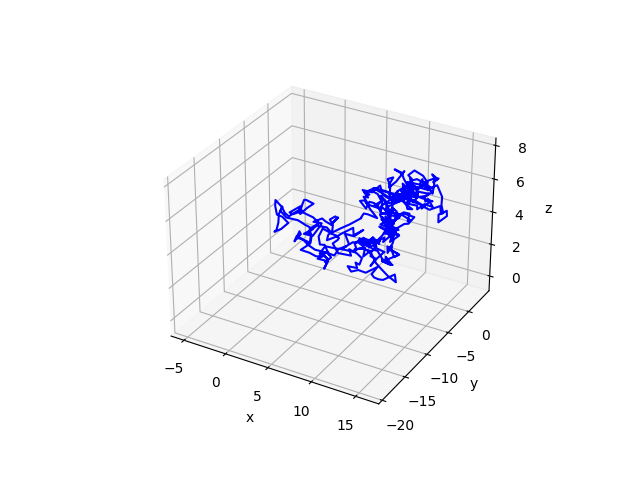

In [5]:

X = random_walk(N = 500)
walk_plot_3D(X)
plt.show()




And the 2D plot:

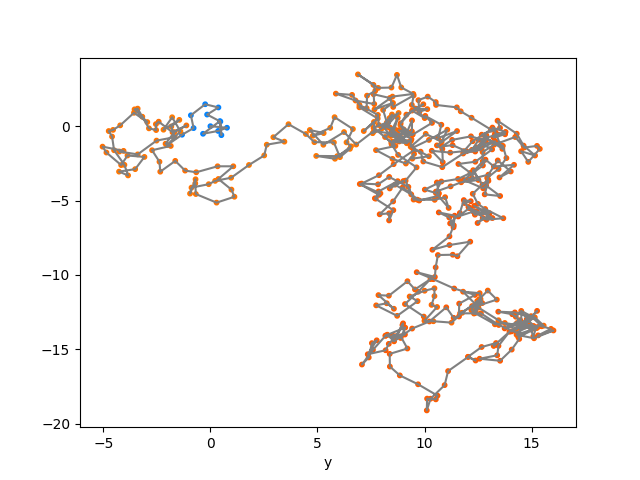

In [6]:

#fig2 = plt.figure(2)
walk_plot_2D(X)
plt.show()

If $l_1 > 0 , \, l2 < 0 $, the group is a C-group, the probability of staying near the origin decays very fast  (like $\mathrm{e}^{-c n^{1/3}}$). The 2D projection of the random walk will most of the time look roughly like a cross.
 The fluctuations in x and y depend exponentially on the $z$ variable. The maximal fluctuations in $x$ (resp $y$) are the only which are not negligble. They occur around the maximum  (resp. minimum) of the z coordinate.

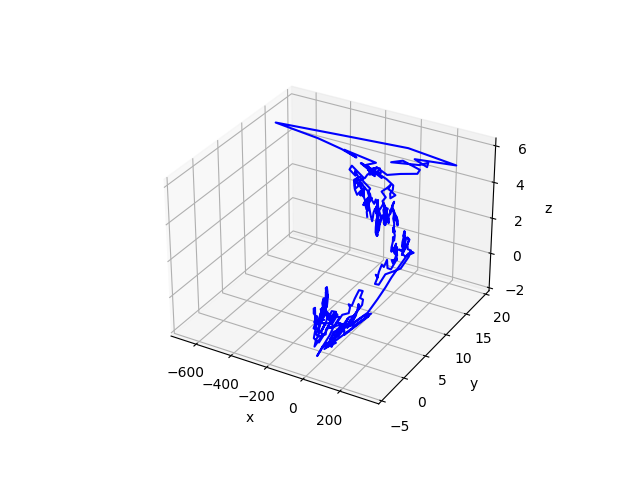

In [7]:
l1 = 1 
l2 = -1
X = random_walk(N = 500, l1 = l1 , l2 = l2)
walk_plot_3D(X)
plt.show()



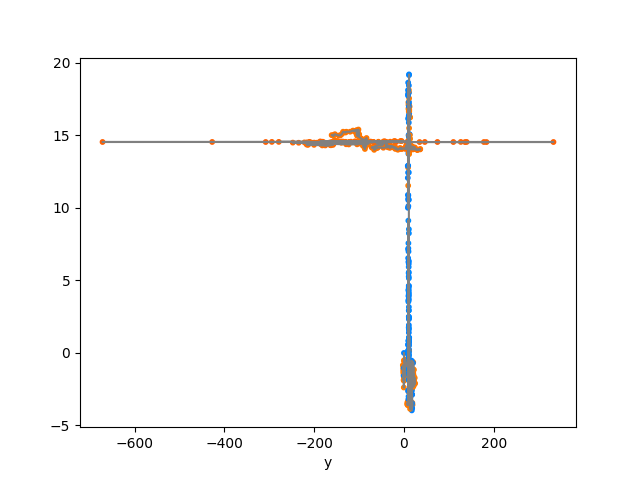

In [8]:
#fig2 = plt.figure(2)
walk_plot_2D(X)
plt.show()

We can compare the trajectories of the 3 axes: x and y are in log scale.

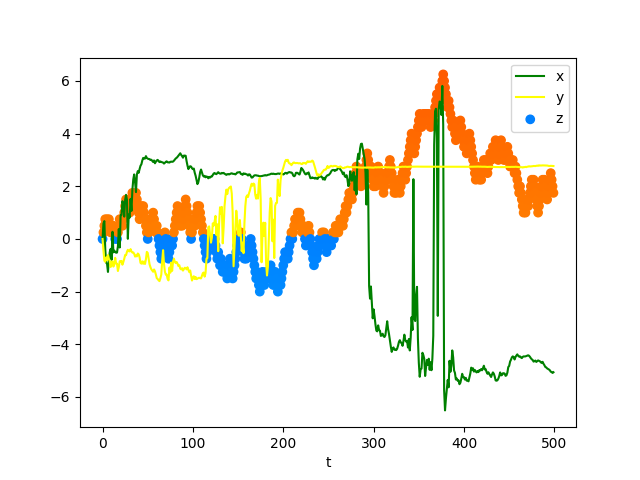

In [9]:
time_plot_2D_log(X)

I didn't figure out yet how to do dynamic plot in Jupyter notebook. Don't use the dynamic plot functions

Here we plot the NC group case i.e. when $l_1$ and $l_2$ have the same sign ($>0$ here). The fluctuations are extremely small when $z <  0 $ and huge when $z > 0 $.

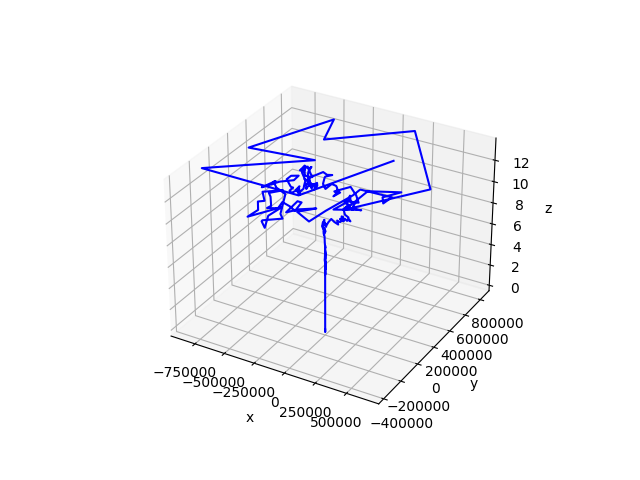

In [10]:
l1 = 1 
l2 = 1
X = random_walk(N = 500, l1 = l1 , l2 = l2)
walk_plot_3D(X)
plt.show()


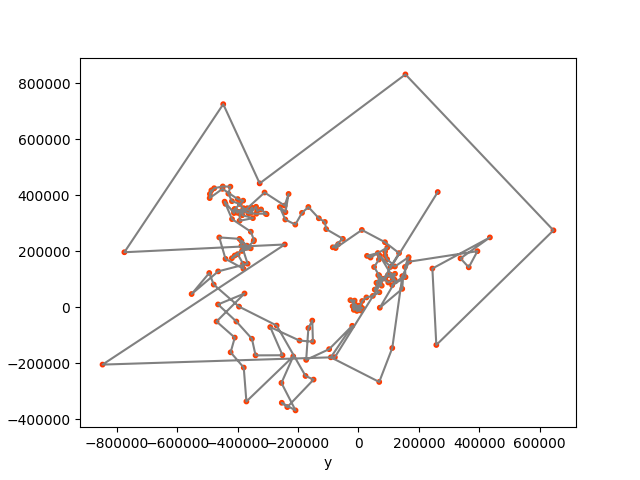

In [11]:

walk_plot_2D(X)
plt.show()

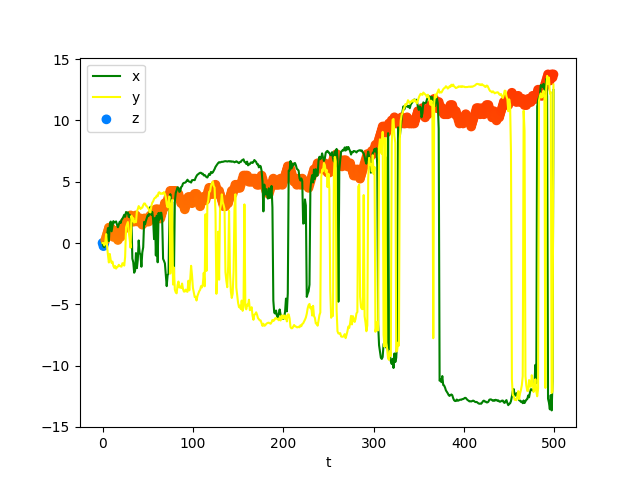

In [12]:
time_plot_2D_log(X)

## Speed of transience

The C theorem tells us how fast the probability of staaying in a compact decays with time. Let us test this it. The $decay \_ speed$ function tests how quickly we leave a given compact. It returns a  list. Its ith element is the numbers of  walks that were in the compact after i step of the walk. (It has size $step$).

In [13]:
def is_in(xm , xM , ym  , yM , zm , zM,x   ): # test wheter a point t belongs to the region [xm, xM]x [ym , yM] x [zm , zM]
    return  xm <= x[0] <= xM and ym <= x[1] <=yM and zm <= x[2] <= zM
def decay_speed(iter, step, xm = -2 , xM = 2, ym = -2 , yM = 2, zm = -2 , zM = 2,l1 = l1, l2 =l2 ):
    print(l1,l2)
    tab = [0]*step
    for i in range(iter):
        X = random_walk(X0 = X0, N = step, l1 = l1, l2 = l2)
        for j in range(len(X)):
            if is_in(xm , xM , ym  , yM , zm , zM,X[j] ):
                tab[j] += 1
    return tab


We fix $l_2 = 1$ and we see how the probabilities of leaving a compact evolves depending on parameters $l_1$.  We should see  something close to a line when $ l_1 < 0$ and the decay should me much slower (logarithmic) when $l_1 \leq 0$. Might take up to 50 seconds.

-3.0 1
-2.5 1
-2.0 1
-1.5 1
-1.0 1
-0.5 1
0.0 1
0.5 1
1.0 1
1.5 1
2.0 1
2.5 1


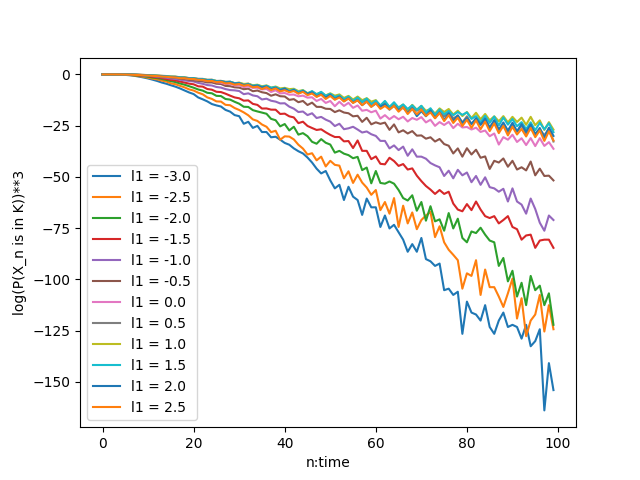

In [14]:

iter = 10000
step = 100
fig = plt.figure()
plt.ylabel("log(P(X_n is in K))**3")
plt.xlabel("n:time")
for l1 in range(-30,30, 5):
    t = decay_speed(iter,step, l1 = l1/10, l2  = 1 )
    #t2 = [ (N/max(i,1))**(2/3) for i in t]
    t2 = [  np.log(max(1, i)/iter)**3 for i in t]

    plt.plot(np.linspace(0,step-1,step), t2, label = "l1 = " +  str(l1/10) )
plt.legend()
plt.show()

We observe the decay for different values of $l_1 >0$ and $l_2 < 0$. It might take about 20 seconds.

0.5 -1


C:\Users\natha\AppData\Local\Temp\ipykernel_17796\2465606938.py:12: RuntimeWarning: invalid value encountered in double_scalars
  t2 = [ ( np.log(max(1, t[i])/iter))/(i**(1/3)) for i in range(len(t))]


[nan, 0.0, -0.007656334539858934, -0.0753679662391386, -0.13243491667528196, -0.19081222216479124, -0.2350407616973896, -0.2713248782839708, -0.30661377869203593, -0.33806210529617675, -0.3585195063555843, -0.38000948890755665, -0.4002268416920939, -0.42284591748511796, -0.43499281685193864, -0.45077126163960174, -0.47227955245935566, -0.48209421576878164, -0.48695576803566804, -0.509319268153367, -0.5163579313156798, -0.5411490147399436, -0.5411783588748662, -0.5594871233507638, -0.5564043977559174, -0.582298209721848, -0.5767791330813022, -0.5949941616496771, -0.5947664536314685, -0.6136057968565035, -0.6016623520353547, -0.6272426040300879, -0.621318153218742, -0.6438416629454123, -0.6250604950868688, -0.6489525020652436, -0.6431402866845464, -0.6588775052945999, -0.6399755974140524, -0.6609702848967626, -0.648618464157758, -0.6706756760461122, -0.6697022603100271, -0.6889073442698973, -0.6786292023206114, -0.6970471305294187, -0.6815000101115551, -0.7019614840047068, -0.68551510213

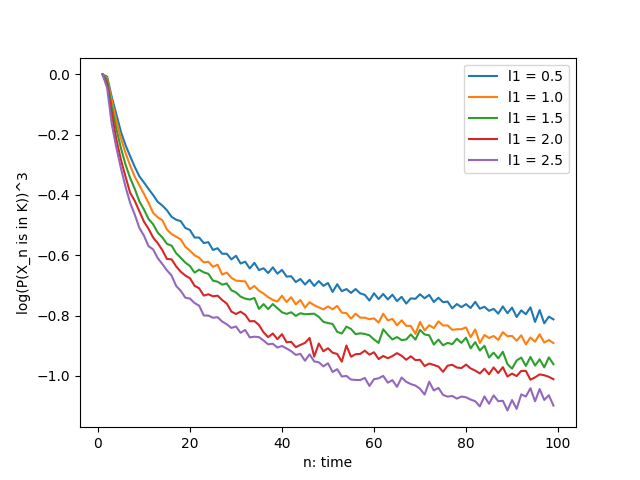

In [15]:
l2 = -1 
iter = 10000
step = 100
fig = plt.figure()
plt.ylabel("log(P(X_n is in K))^3")
plt.xlabel("n: time")
for l1 in range(5,30, 5):
    t = decay_speed(iter,step, l1 = l1/10, l2 = -1 )
    #print(l1)
    #t2 = [ (N/max(i,1))**(2/3) for i in t]
    #t2 = [ ( np.log(max(1, i)/iter))**3 for i in t]
    t2 = [ ( np.log(max(1, t[i])/iter))/(i**(1/3)) for i in range(len(t))]
    print(t2)
    plt.plot(np.linspace(0,step-1,step), t2, label = "l1 = " +  str(l1/10) )
plt.legend()
plt.show()

Focus on the NC case: $l_1$ and $l_2$ are set to positive value, the probability is plot in the scale of decay of the simple random walk ($n^{-3/2}$). It might take up to 20 seconds.

0.5 1
1.0 1
1.5 1
2.0 1
2.5 1


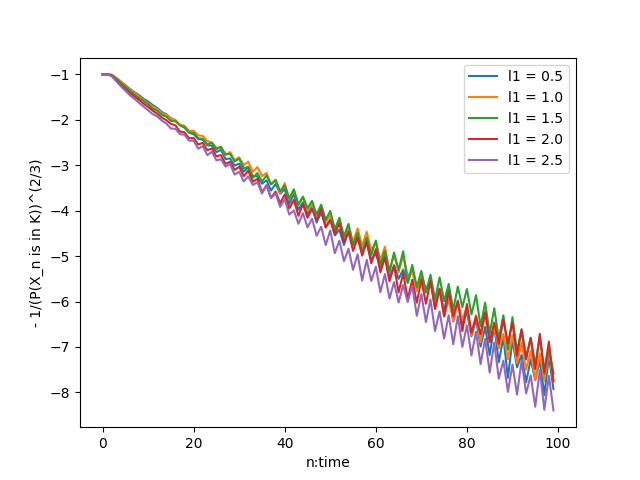

In [ ]:
l2 = 1
iter = 10000
step = 100
fig = plt.figure()
plt.ylabel("- 1/(P(X_n is in K))^(2/3)")
plt.xlabel("n:time")
for l1 in range(5,30, 5):
    t = decay_speed(iter,step, l1 = l1/10 )
    t2 = [ - (iter/max(i,1))**(2/3) for i in t]
    #t2 = [ ( np.log(max(1, i)/iter))**3 for i in t]

    plt.plot(np.linspace(0,step-1,step), t2, label = "l1 = " +  str(l1/10) )
plt.legend()
plt.show()

In [17]:
plt.close() #run this if execution is getting slow, closes all matplotlib figures

The exponent in the NC theorem is 3/2 here which is indeed the case

No such comm: 5bc1e27f01754213aa5141f115b45424


0.5 1
1.0 1
1.5 1
2.0 1
2.5 1


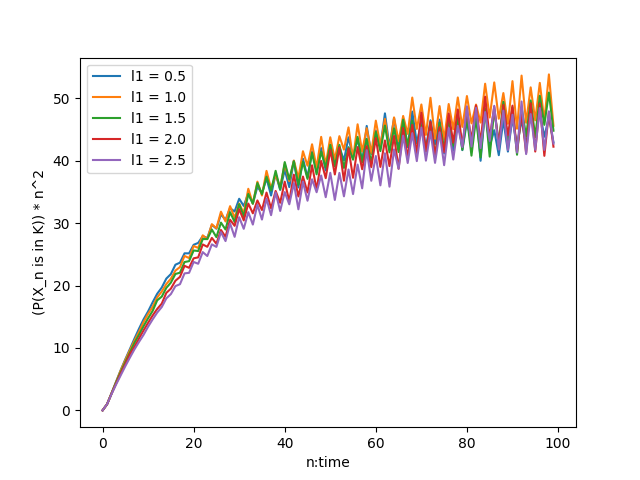

In [18]:
l2 = 1 #la probabilité de ne décroit pas asssez vite ce qui est embêtant car en tant que symétrie ca devrait matcher 
#La mesure n'est pas symétrique mais elle est centrée ca devrait marcher: centrée car l'abélianisé est R^2 donc aucun problème ici.
iter = 10000
step = 100
fig = plt.figure()
plt.ylabel("(P(X_n is in K)) * n^2")
plt.xlabel("n:time")
for l1 in range(5,30, 5):
    t = decay_speed(iter,step, l1 = l1/10 )
    t2 = [ (t[i]/iter)*i**(3/2) for i in range(len(t))]
    #t2 = [ ( np.log(max(1, i)/iter))**3 for i in t]

    plt.plot(np.linspace(0,step-1,step), t2, label = "l1 = " +  str(l1/10) )
plt.legend()
plt.show()

1 1


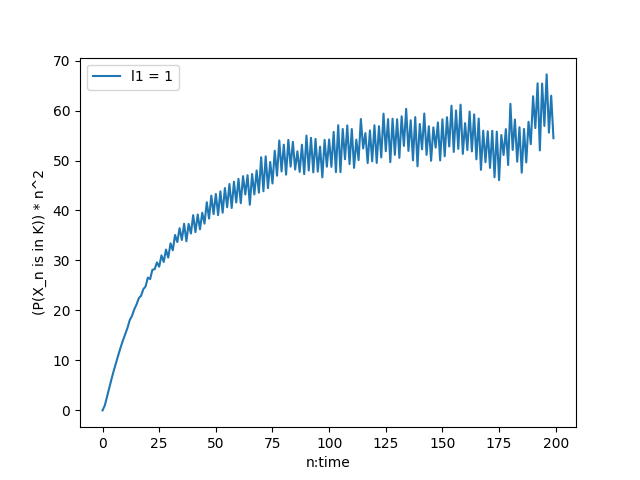

In [19]:
l2 = 1
l1 = 1
iter = 10000
step = 200
fig = plt.figure()
plt.ylabel("(P(X_n is in K)) * n^2")
plt.xlabel("n:time")
t = decay_speed(iter,step, l1 = l1)
#t2 = [ (t[i]/iter)*i**2 for i in range(len(t))]
t3 = [ (t[i]/iter)*i**(3/2) for i in range(len(t))]
#t2 = [ ( np.log(max(1, i)/iter))**3 for i in t]

#plt.plot(np.linspace(0,step-1,step), t2, label = "l1 = " +  str(l1) )
plt.plot(np.linspace(0,step-1,step), t3, label = "l1 = " +  str(l1) )
plt.legend()
plt.show()

1.276883220553783
-5 2
[-1.6021056292186526, -1.5993047395394207, -1.596523334379126, -1.5937611777649023, -1.591018037785403, -1.5882936865003932, -1.5855878998528006, -1.5829004575831538, -1.5802311431463307, -1.5775797436305377]


C:\Users\natha\AppData\Local\Temp\ipykernel_17796\2903652619.py:12: RuntimeWarning: invalid value encountered in double_scalars
  t2 = [ ( np.log(max(1, t[i])/iter))/(i**(1/3)) for i in range(len(t))]


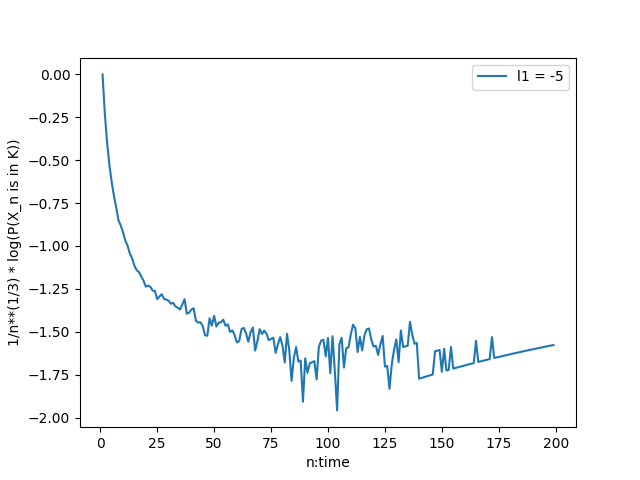

In [20]:
iter = 10000
step = 200
l1 = - 5
fig = plt.figure()
print(3 * (np.pi**2/(4*16*2) )**(1/3))


plt.ylabel("1/n**(1/3) * log(P(X_n is in K))")
plt.xlabel("n:time")

t = decay_speed(iter,step, l1 = l1, l2  = 2 )
t2 = [ ( np.log(max(1, t[i])/iter))/(i**(1/3)) for i in range(len(t))]
print(t2[step-10:])
plt.plot(np.linspace(0,step-1,step), t2, label = "l1 = " +  str(l1  ) )
plt.legend()
plt.show()

In [21]:
iter = 10000
step = 200
l1 = - 5
fig = plt.figure()
#print(3 * (np.pi**2/(4*16*2) )**(1/3))
stat = [0]*100
for l1 in range(1,101):
    t = decay_speed(iter,step, l1 = l1/100, l2  = -1 )
    stat[l1 -1] = t[step - 1]
plt.plot(np.linspace(0.01, 1, 100), stat)


plt.legend()
plt.show()

0.01 -1
0.02 -1
0.03 -1
0.04 -1
0.05 -1
0.06 -1
0.07 -1
0.08 -1
0.09 -1
0.1 -1
0.11 -1


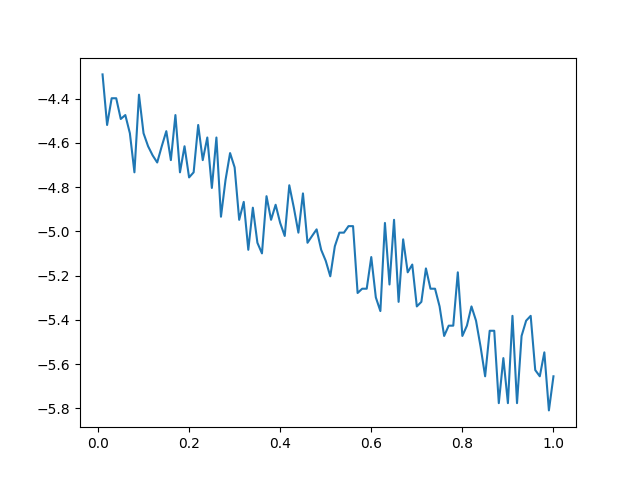

In [ ]:
fig = plt.figure()
#print([np.log(stat[i]/10000)* ((i+1)**(-4/2)) for i in range(len(stat))])
plt.plot(np.linspace(0.01, 1, 100), [np.log(stat[i]/10000) for i in range(len(stat))])
plt.show()

Note: faire les choses mieux en evitant de ressimuler la marche aléatoire trop de fois (i.e pour chaque groupe: collecter quelques milliers de marches et les garder pour moyenner desssus
)